In this notebook, customer complaint database is loaded and explored.
Load necessary module and then load complaint dataset.

In [109]:
# Read data from pandas
import numpy as np 
import pandas as pd 
import datetime as dt

# for warnings
import warnings 
warnings.filterwarnings("ignore")

# for pretty picture
import matplotlib.pyplot as plt
colors =['red','green','blue','yellow','orange','violet','purple','cyan']

import seaborn as sns
sns.set(style="whitegrid")
sns.set(font_scale=1.3)



In [81]:
#load dataset
complaints=pd.read_csv(r'C:\Shalini\Project-1\extra_dataset_complaint\complaints.csv')

In [4]:
# lets check the column
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

### Column name contaings white space and punctuation marks. For easy access rename the columns  

In [83]:
# rename column names

complaints.columns = [name.lower() for name in complaints.columns.str.replace(" ", "_")]
complaints.columns = [name.lower() for name in complaints.columns.str.replace("?", "")]
complaints.columns

Index(['date_received', 'product', 'sub-product', 'issue', 'sub-issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zip_code', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed', 'complaint_id'],
      dtype='object')

In [12]:
#find out the shape of dataframe
complaints.shape

(1048575, 18)

In [13]:
complaints.dtypes

date_received                    object
product                          object
sub-product                      object
issue                            object
sub-issue                        object
consumer_complaint_narrative     object
company_public_response          object
company                          object
state                            object
zip_code                         object
tags                             object
consumer_consent_provided        object
submitted_via                    object
date_sent_to_company             object
company_response_to_consumer     object
timely_response                  object
consumer_disputed                object
complaint_id                    float64
dtype: object

In [14]:
complaints.describe().T

,count,mean,std,min,25%,50%,75%,max
complaint_id,1042149.0,1.988946e+06,1.067139e+06,1.0,1049665.0,2145007.0,2845366.0,3487457.0


In [15]:
complaints.head(2).T

,0,1
date_received,24/09/2019,19/09/2019
product,Debt collection,"Credit reporting, credit repair services, or o..."
sub-product,I do not know,Credit reporting
issue,Attempts to collect debt not owed,Incorrect information on your report
sub-issue,Debt is not yours,Information belongs to someone else
consumer_complaint_narrative,transworld systems inc. \nis trying to collect...,NaN
company_public_response,NaN,Company has responded to the consumer and the ...
company,TRANSWORLD SYSTEMS INC,Experian Information Solutions Inc.
state,FL,PA
zip_code,335XX,15206


In [16]:

complaints.isnull().sum()

date_received                     6426
product                           6426
sub-product                     190301
issue                             6426
sub-issue                       430883
consumer_complaint_narrative    762872
company_public_response         687630
company                           6426
state                            22533
zip_code                         89706
tags                            905787
consumer_consent_provided       499828
submitted_via                     6426
date_sent_to_company              6426
company_response_to_consumer      6426
timely_response                   6426
consumer_disputed               445277
complaint_id                      6426
dtype: int64

In [17]:
pd.DataFrame(complaints['product'].unique()).values

array([['Debt collection'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Vehicle loan or lease'],
       ['Credit card or prepaid card'],
       ['Money transfer, virtual currency, or money service'],
       ['Mortgage'],
       ['Student loan'],
       ['Checking or savings account'],
       ['Payday loan, title loan, or personal loan'],
       ['Credit card'],
       ['Consumer Loan'],
       ['Payday loan'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Other financial service'],
       ['Money transfers'],
       ['Prepaid card'],
       ['Virtual currency'],
       [nan]], dtype=object)

### Uni-variate exploration 
Analysis of data with single variable

#### Data distribution with respect to consumer_disputed attribute

In [21]:
complaints['consumer_disputed'].value_counts()

No     488103
Yes    115195
Name: consumer_disputed, dtype: int64

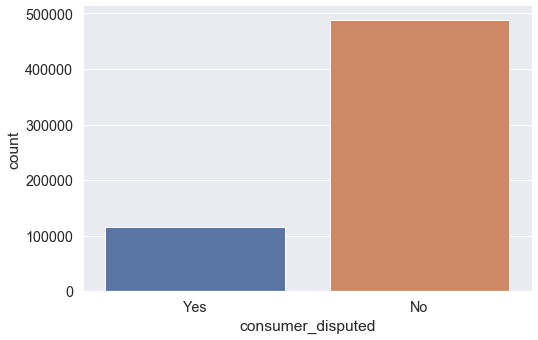

In [22]:
sns.factorplot(x="consumer_disputed", data=complaints, kind="count", size=5, aspect=1.5) 
               
plt.show();

### Finding complaints raised for each kind of products in list

In [23]:
complaints.groupby(['product']).count().consumer_complaint_narrative

product
Bank account or service                                                          7328
Checking or savings account                                                     11855
Consumer Loan                                                                    4514
Credit card                                                                      9111
Credit card or prepaid card                                                     19979
Credit reporting                                                                15976
Credit reporting, credit repair services, or other personal consumer reports    92818
Debt collection                                                                 60147
Money transfer, virtual currency, or money service                               5057
Money transfers                                                                   743
Mortgage                                                                        33640
Other financial service                       

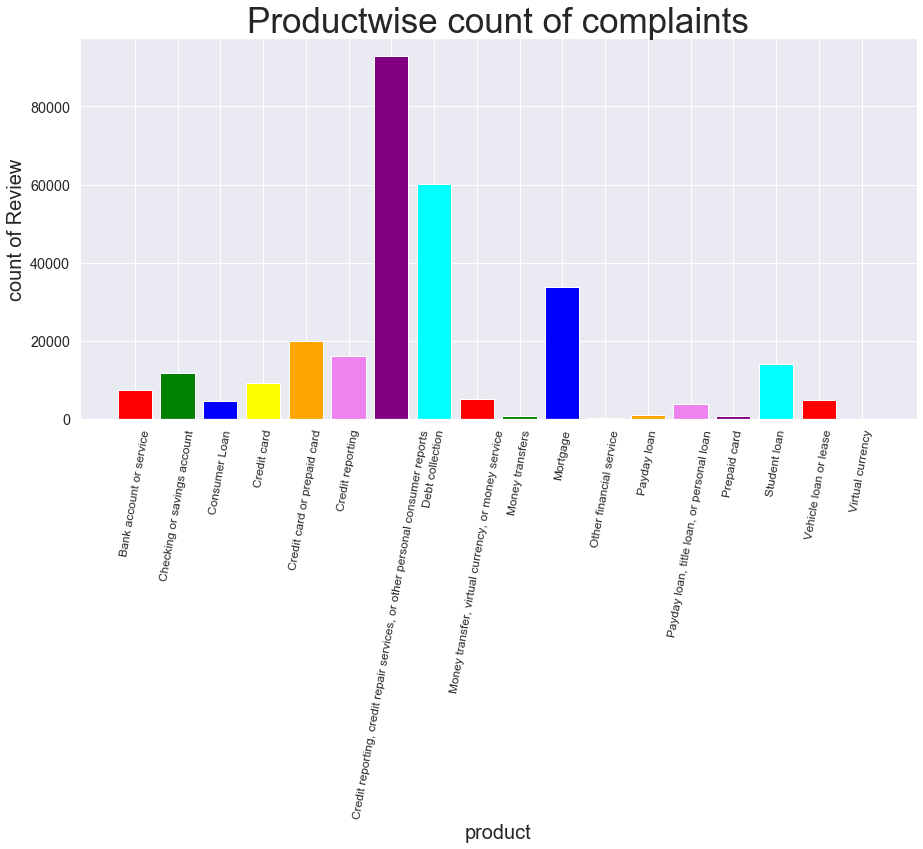

In [24]:

plt.figure(figsize = (15,7))
df_groupby_prod=complaints.groupby(['product']).count()
plt.bar(df_groupby_prod.index.values ,df_groupby_prod['consumer_complaint_narrative'] ,color=colors)
plt.title("Productwise count of complaints", fontsize =35)
plt.xlabel('product' , fontsize=20)
plt.ylabel('count of Review', fontsize=20)

plt.xticks(df_groupby_prod.index.values)
plt.xticks(rotation=80, size=12)

plt.show()


#### Find total of complaints for each company
There are total 4960 companies 

In [31]:
len(complaints['company'].unique())

4960

#### Total 4960 companies, That is lots of companies to plot. find top 7 companies in terms of getting highest number of complaints.

In [168]:
df_comp_response=complaints.groupby(['company']).count()
df_comp_response.sort_values(by=['company_public_response'],  inplace=True, ascending=False)
df_comp_response['company_public_response'].head(5)

company
TRANSUNION INTERMEDIATE HOLDINGS, INC.    73118
Experian Information Solutions Inc.       71977
WELLS FARGO & COMPANY                     27768
BANK OF AMERICA, NATIONAL ASSOCIATION     27308
CITIBANK, N.A.                            22184
Name: company_public_response, dtype: int64

In [163]:
df_groupby_company=complaints.groupby(['company']).count()

df_groupby_company.sort_values(by=['consumer_complaint_narrative'],  inplace=True, ascending=False)

df_groupby_company=df_groupby_company.head(7)


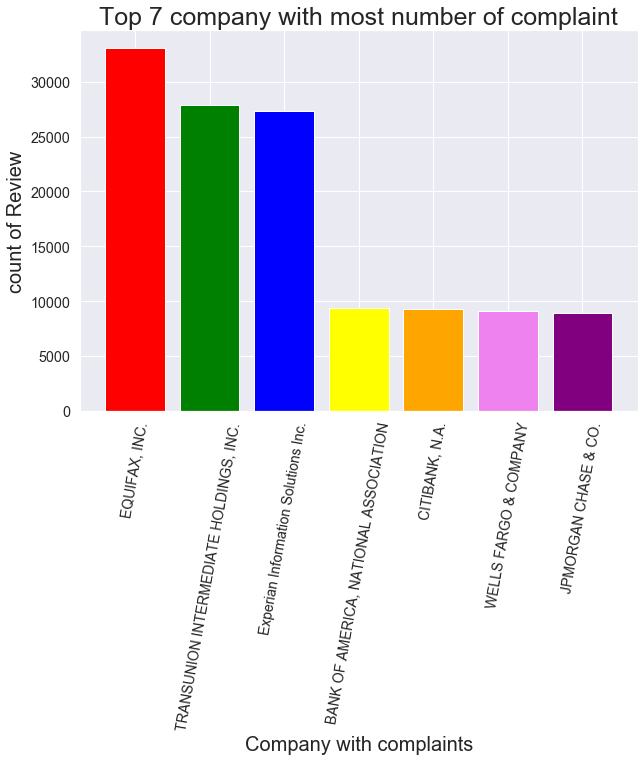

In [162]:
plt.figure(figsize = (10,7))


plt.bar(df_groupby_company.index.values ,df_groupby_company['consumer_complaint_narrative'] ,color=colors)
plt.title('Top 7 company with most number of complaint', fontsize=25)

plt.xlabel('Company with complaints', fontsize=20)
plt.ylabel('count of Review' ,fontsize=20)
plt.xticks(rotation=80 , size =14)

plt.show()

#### Finding which issues are more famous amognst complaint

In [37]:
len(complaints['issue'].unique())

167

In [41]:
df_groupby_issue = complaints['issue'].value_counts()
df_groupby_issue.head(10)

Incorrect information on your report                                                126008
Loan modification,collection,foreclosure                                             93447
Incorrect information on credit report                                               81348
Loan servicing, payments, escrow account                                             61087
Problem with a credit reporting company's investigation into an existing problem     46982
Cont'd attempts collect debt not owed                                                46085
Attempts to collect debt not owed                                                    35416
Account opening, closing, or management                                              30552
Communication tactics                                                                27166
Improper use of your report                                                          26778
Name: issue, dtype: int64

##### total number of uniques issue types are 166. let us check top 10 most common issue

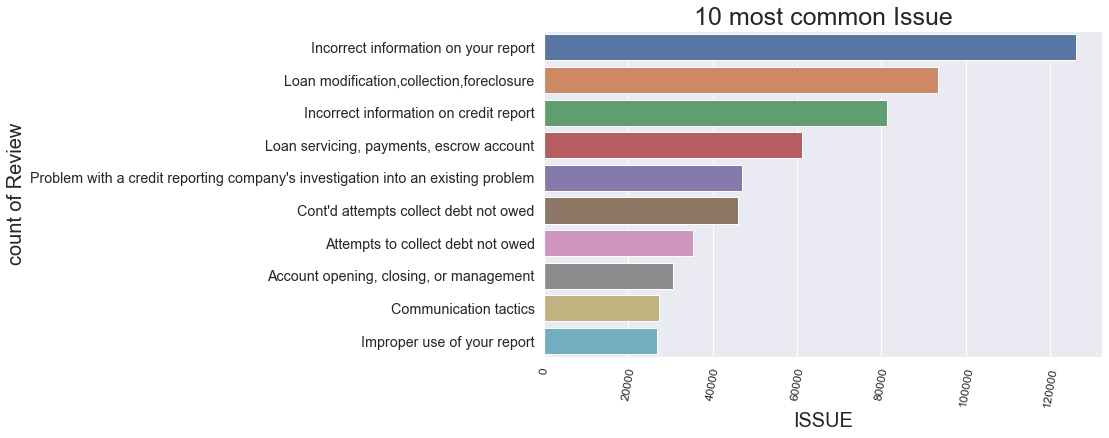

In [38]:
df_groupby_issue=df_groupby_issue.head(10)

plt.figure(figsize = (10,6))
sns.barplot(df_groupby_issue.values ,df_groupby_issue.index)
plt.title('10 most common Issue',fontsize=25)
plt.xlabel('ISSUE',fontsize=20)
plt.ylabel('count of Review', fontsize=20)
plt.xticks(rotation=80, size=12)

plt.show()

### Company respose in relation to the complaints.
Finding: most of the compalints were closed with explanation. Now, this value can affect consumer_dispute value.

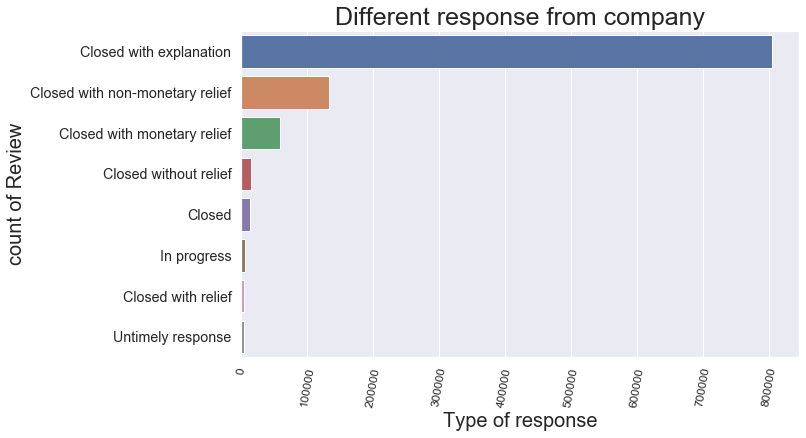

In [62]:
df_groupby_comp_resp=complaints['company_response_to_consumer'].value_counts()

plt.figure(figsize = (10,6))
sns.barplot(df_groupby_comp_resp.values ,df_groupby_comp_resp.index)
plt.title('Different response from company',fontsize=25)
plt.xlabel('Type of response',fontsize=20)
plt.ylabel('count of Review', fontsize=20)
plt.xticks(rotation=80, size=12)

plt.show()

### It is a statewise count of complaints 

In [49]:
len(complaints['state'].unique() )

64

In [170]:

df_groupby_state=complaints.groupby(['state']).count()

df_groupby_state.sort_values(by=['consumer_complaint_narrative'],  inplace=True, ascending=False)

df_groupby_state=df_groupby_state.head(10)
df_groupby_state['consumer_complaint_narrative']

state
CA    38051
FL    29475
TX    27016
GA    17492
NY    16342
IL    10961
PA     9606
NC     9191
NJ     9053
OH     8501
Name: consumer_complaint_narrative, dtype: int64

#### Total 64 companies are tere in the dataset , plot Top 10 companies with most number of complaints
Finding: State 'CA' has most number of complaints 

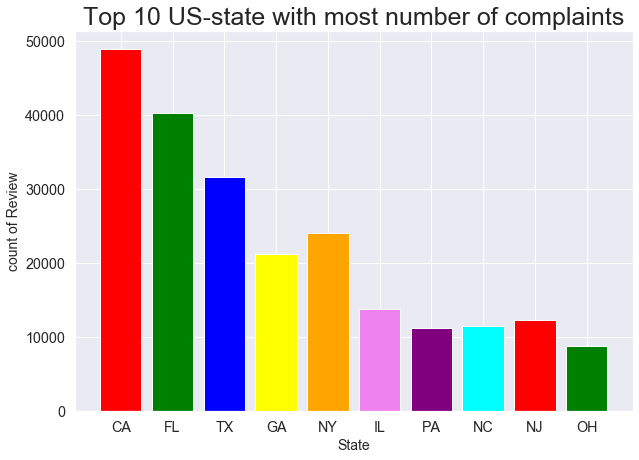

In [50]:


plt.figure(figsize = (10,7))
plt.bar(df_groupby_state.index.values ,df_groupby_state['consumer_complaint_narrative'],color=colors)
plt.bar(df_groupby_state.index.values ,df_groupby_state['company_public_response'] ,color=colors)
plt.title('Top 10 US-state with most number of complaints',fontsize=25)
plt.xlabel('State', fontsize=14)
plt.ylabel('count of Review', fontsize=14)

plt.show()


### Distribution of complanits in terms of tags. Tags are lebel for set of customer created for research and analysis purpose

In [51]:
complaints.groupby(['tags']).count()

,date_received,product,sub-product,issue,sub-issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
tags,,,,,,,,,,,,,,,,,
Older American,63303,63303,47116,63303,26882,14900,19009,63303,62243,58030,26064,63303,63303,63303,63303,48413,63303
"Older American, Servicemember",11880,11880,10389,11880,6238,3991,4313,11880,11580,10397,5643,11880,11880,11880,11880,6805,11880
Servicemember,67605,67605,60667,67605,47348,30146,27031,67605,66834,59468,46637,67605,67605,67605,67605,28549,67605


### Complaints were submitted using these 6 ways.

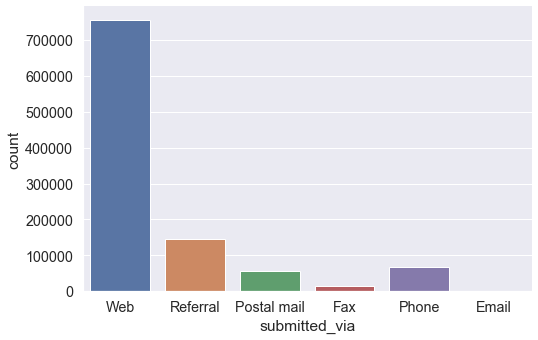

In [54]:
complaints.groupby(['submitted_via']).count()

sns.factorplot(x="submitted_via", data=complaints, kind="count", size=5, aspect=1.5)
plt.show();

### Explore timeline of complaints 
     Find out the months or year when most complaints were submitted.

In [173]:

complaints['date_received_datetype']=pd.to_datetime(complaints['date_received'])
complaints['date_sent_datetype']=pd.to_datetime(complaints['date_sent_to_company'])

max(complaints['date_sent_datetype'] - complaints['date_received_datetype'])

Timedelta('1962 days 00:00:00')

In [176]:
complaints['date_diff']=complaints['date_sent_datetype'] - complaints['date_received_datetype'] 

In [183]:
complaints['date_diff'].describe().T

count                    1042149
mean      2 days 16:29:38.076647
std      60 days 14:38:03.470799
min          -334 days +00:00:00
25%              0 days 00:00:00
50%              0 days 00:00:00
75%              2 days 00:00:00
max           1962 days 00:00:00
Name: date_diff, dtype: object

In [90]:
# create new variable year and month using date_received values


# for year
complaints['date_received_Year']= pd.to_numeric( complaints['date_received_datetype'].dt.year)

#for month
complaints['date_received_Month']= pd.to_numeric( complaints['date_received_datetype'].dt.month )
#for day 
complaints['date_received_Day']= pd.to_numeric( complaints['date_received_datetype'].dt.day )


In [185]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
date_received                   1042149 non-null object
product                         1042149 non-null object
sub-product                     858274 non-null object
issue                           1042149 non-null object
sub-issue                       617692 non-null object
consumer_complaint_narrative    285703 non-null object
company_public_response         360945 non-null object
company                         1042149 non-null object
state                           1026042 non-null object
zip_code                        958869 non-null object
tags                            142788 non-null object
consumer_consent_provided       548747 non-null object
submitted_via                   1042149 non-null object
date_sent_to_company            1042149 non-null object
company_response_to_consumer    1042149 non-null object
timely_response                 1042149 non-null objec

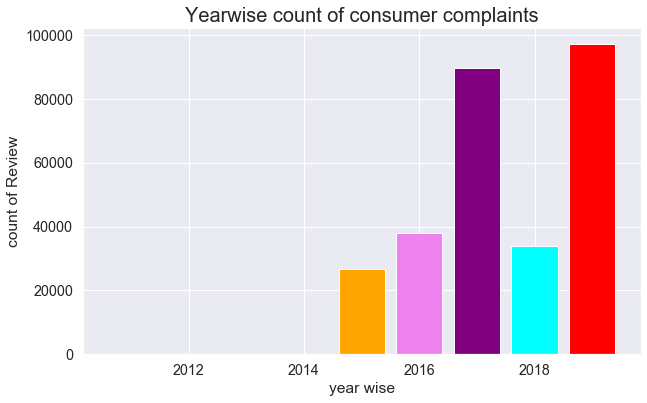

In [184]:

df_groupby_date_received_year=complaints.groupby(['date_received_Year']).count()
plt.figure(figsize = (10,6))

plt.bar(df_groupby_date_received_year.index.values ,df_groupby_date_received_year['consumer_complaint_narrative'] ,color=colors)
plt.title('Yearwise count of consumer complaints', fontsize=20)
plt.xlabel('year wise')
plt.ylabel('count of Review')

plt.show()

### Month-wise count of complaints
Most of the complaint came in year 2019. and also there is no record of complaint narrative for years 2012, 2013, 2014 .
Let us plot month wise data

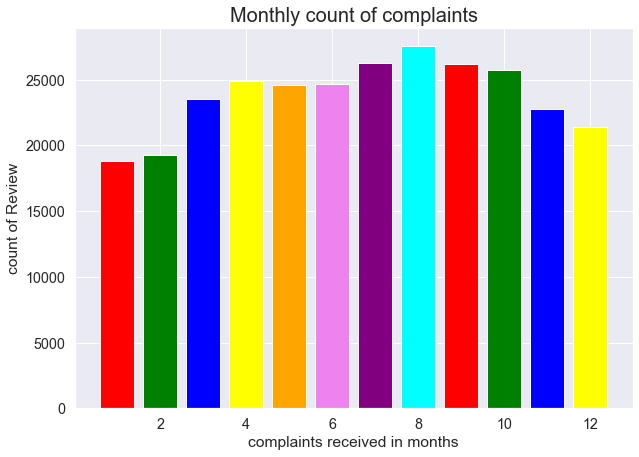

In [114]:
df_groupby_date_received_month=complaints.groupby(['date_received_Month']).count()

plt.figure(figsize = (10,7))
plt.bar(df_groupby_date_received_month.index.values ,df_groupby_date_received_month['consumer_complaint_narrative'] ,color=colors)
plt.title('Monthly count of complaints',fontsize=20)
plt.xlabel('complaints received in months')
plt.ylabel('count of Review')

plt.show()

### Timely response for a complaint

In [188]:
complaints.groupby(['timely_response']).count().consumer_complaint_narrative

timely_response
No       7634
Yes    278069
Name: consumer_complaint_narrative, dtype: int64

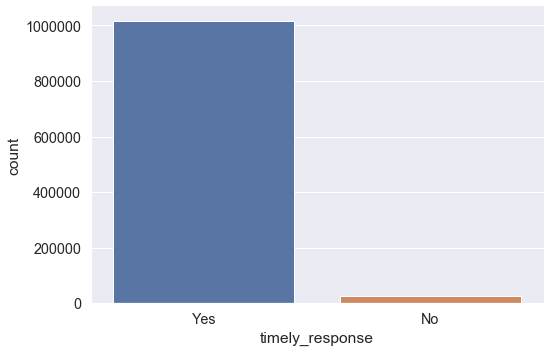

In [186]:
#complaints.groupby(['timely_response']).count()

sns.factorplot(x="timely_response", data=complaints, kind="count", size=5, aspect=1.5)
plt.show();

Data is distributed normally ,though august month have most complaints.

# Bivariate analysis 
Also known as two-variable analysis. It is used to explore the relation between two variables or set of values i.e two columns of dataframe. Results can be stored in two column data table or dataframe or can be visualized.


### Products for which compaints were timely responded.

In [115]:
df_prod_time_CC=complaints.groupby(['product','timely_response']).count().consumer_complaint_narrative
df_prod_time_CC.unstack()
df_prod_time_CC.sort_index(inplace=True)
df_prod_time_CC

product                                                                       timely_response
Bank account or service                                                       No                   312
                                                                              Yes                 7016
Checking or savings account                                                   No                   184
                                                                              Yes                11671
Consumer Loan                                                                 No                   263
                                                                              Yes                 4251
Credit card                                                                   No                   102
                                                                              Yes                 9009
Credit card or prepaid card                                                   No  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

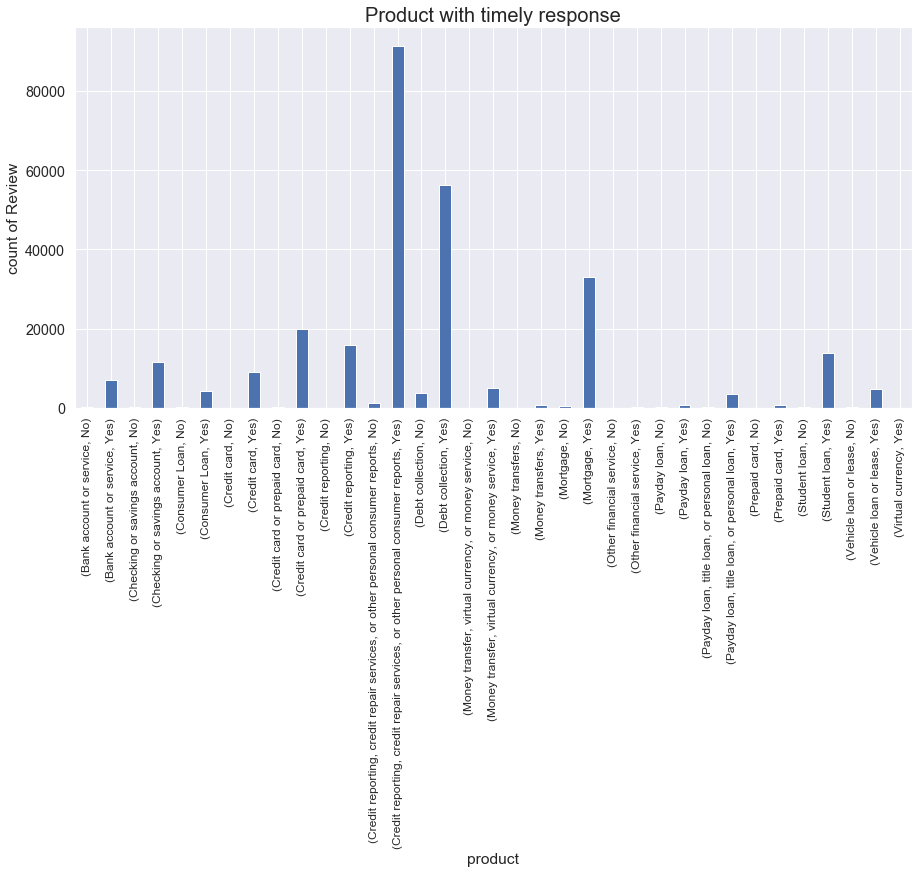

In [116]:

#plot data
fig, ax = plt.subplots(figsize=(15,7))
complaints.groupby(['product','timely_response']).count()['consumer_complaint_narrative'].plot.bar(ax=ax)

plt.title('Product with timely response',fontsize =20)
plt.xlabel('product')
plt.ylabel('count of Review')
plt.xticks(rotation=90, size=12)



Finding:  if we see the product for which timely response was NOT there it was 'Debt collection'.
but complaint for product 'Credit reporting, credit repair services, or other personal consumer reports' were responded timely.

## Productwise count of complaints for each company
For each company which product is having many comapliants. as there are 4960 companies, plotting it can be messy and not-understandable. so, selected two random company to show the data. 

In [117]:
df_cpc=pd.DataFrame(complaints.groupby(['company','product'])['consumer_complaint_narrative'].count())


df_cpc.loc['21ST MORTGAGE CORP.']


,consumer_complaint_narrative
product,
Consumer Loan,1
Credit reporting,0
"Credit reporting, credit repair services, or other personal consumer reports",5
Debt collection,4
Mortgage,61


In [118]:
df_cpc.loc['CITIBANK, N.A.']

,consumer_complaint_narrative
product,
Bank account or service,638
Checking or savings account,732
Consumer Loan,45
Credit card,1862
Credit card or prepaid card,3228
Credit reporting,34
"Credit reporting, credit repair services, or other personal consumer reports",899
Debt collection,853
"Money transfer, virtual currency, or money service",78


### Product list for company with count of dispute
List of product-wise Count of consumer dispute for each company. Top 10 from list is displayed here 

In [120]:
df_com_disputed=pd.DataFrame(complaints.groupby(['company','product']).count().consumer_disputed)
df_com_disputed.sort_values(by=['consumer_disputed'], inplace=True, ascending=False)

df_com_disputed=df_com_disputed.head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

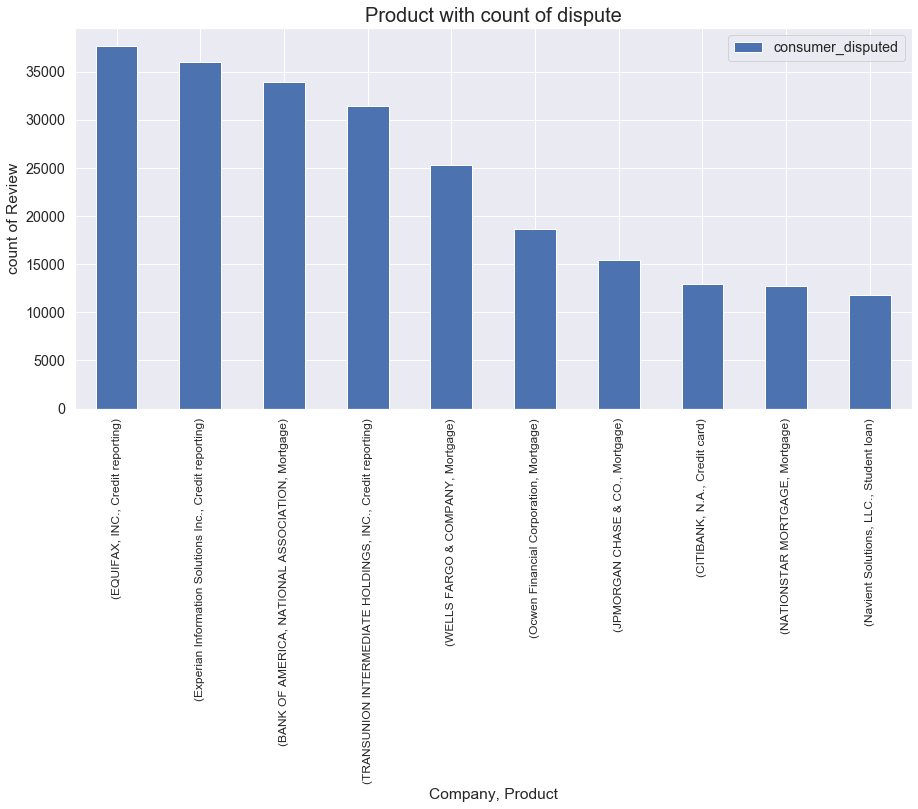

In [138]:
fig, ax = plt.subplots(figsize=(15,7))
df_com_disputed.plot.bar(ax=ax)

plt.title('Product with count of dispute',fontsize =20)
plt.xlabel('Company, Product')
plt.ylabel('count of Review')
plt.xticks(rotation=90, size=12)


### Yearwise product with disputed complaints

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

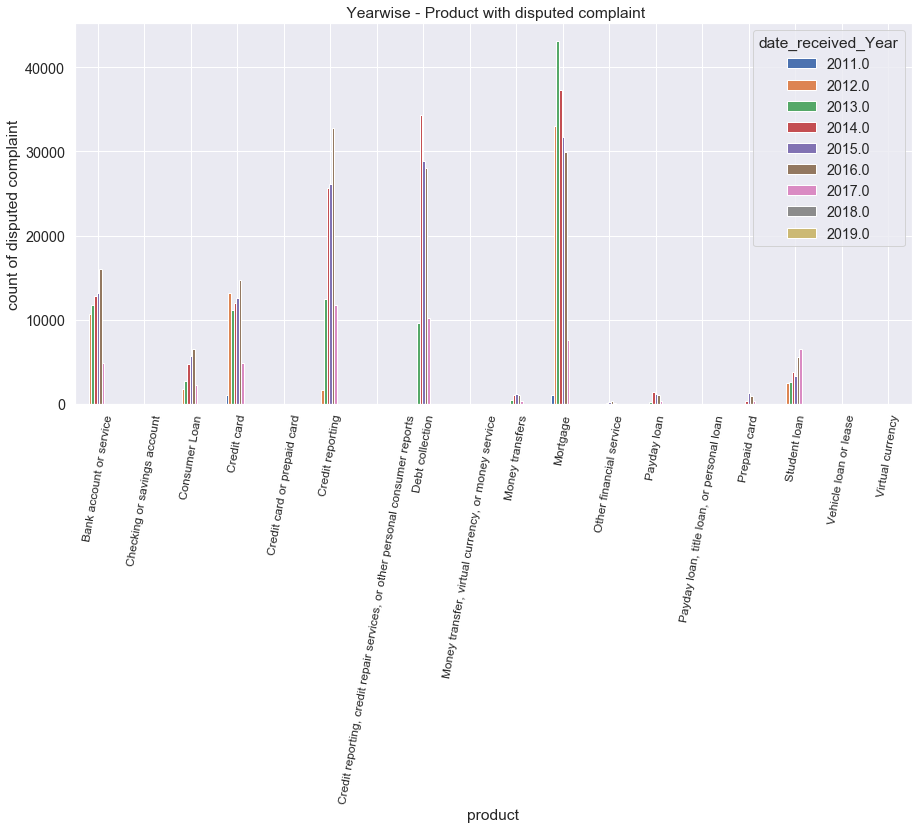

In [139]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))


complaints.groupby(['product','date_received_Year']).count()['consumer_disputed'].unstack().plot.bar(ax=ax)
plt.title(' Yearwise - Product with disputed complaint')
plt.xlabel('product')
plt.ylabel('count of disputed complaint')
plt.xticks(rotation=80, size=12)